# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [308]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [309]:
# the number of unique station they was measuring at.
len(df['ID'].unique())

24

In [310]:
# first, we need to convert the date col to datetime to be more useful.
df['Date'] = pd.to_datetime(df['Date'])

In [311]:
# lets inspect the max and min date for this data.
print(df['Date'].min())
print(df['Date'].max())

2005-01-01 00:00:00
2015-12-31 00:00:00


In [312]:
# lets sort our dataframe from 2005 TO 2015 ascendingly
df.sort_values(by='Date', ascending=True, inplace = True)
# then reset the indexes
df = df.reset_index()

df

,index,ID,Date,Element,Data_Value
0,60995,USW00004848,2005-01-01,TMIN,0
1,17153,USC00207320,2005-01-01,TMAX,150
2,17155,USC00207320,2005-01-01,TMIN,-11
3,10079,USW00014833,2005-01-01,TMIN,-44
4,10073,USW00014833,2005-01-01,TMAX,33
...,...,...,...,...,...
165080,45691,USC00200032,2015-12-31,TMAX,11
165081,10573,USC00205050,2015-12-31,TMIN,-17
165082,21088,USC00208202,2015-12-31,TMAX,0
165083,10253,USC00201250,2015-12-31,TMIN,-6


In [313]:
# create our 2015 year dataframe
year_2015 = df[df['Date'] >= '2015-01-01']

# according to what the Question wants we need to get the last ten years
# (decate) 2005 to 2014. 
df = df[(df['Date'] >= '2005-01-01') & (df['Date'] < '2015-01-01')]

# check
print(df['Date'].min())
print(df['Date'].max())
print(year_2015['Date'].min())

2005-01-01 00:00:00
2014-12-31 00:00:00
2015-01-01 00:00:00


In [314]:
# get the Day , Month , Year each of them in a seperate column.
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

<ipython-input-314-1f1b32042a8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
<ipython-input-314-1f1b32042a8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
<ipython-input-314-1f1b32042a8f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,index,ID,Date,Element,Data_Value,Day,Month,Year
0,60995,USW00004848,2005-01-01,TMIN,0,1,1,2005
1,17153,USC00207320,2005-01-01,TMAX,150,1,1,2005
2,17155,USC00207320,2005-01-01,TMIN,-11,1,1,2005
3,10079,USW00014833,2005-01-01,TMIN,-44,1,1,2005
4,10073,USW00014833,2005-01-01,TMAX,33,1,1,2005


__I'll group by day and month to get a `bunch of dataframes` for each pair of day & month among all the ten years.__

In [315]:
for group ,frame in df.groupby(['Month','Day']):
    print(group)
    print(frame)


(1, 1)
        index           ID       Date Element  Data_Value  Day  Month  Year
0       60995  USW00004848 2005-01-01    TMIN           0    1      1  2005
1       17153  USC00207320 2005-01-01    TMAX         150    1      1  2005
2       17155  USC00207320 2005-01-01    TMIN         -11    1      1  2005
3       10079  USW00014833 2005-01-01    TMIN         -44    1      1  2005
4       10073  USW00014833 2005-01-01    TMAX          33    1      1  2005
...       ...          ...        ...     ...         ...  ...    ...   ...
137380  19325  USC00208080 2014-01-01    TMAX         -56    1      1  2014
137381  18946  USC00200230 2014-01-01    TMIN        -111    1      1  2014
137382  19432  USC00200230 2014-01-01    TMAX         -89    1      1  2014
137383  27797  USC00205050 2014-01-01    TMAX         -72    1      1  2014
137384  27579  USC00208972 2014-01-01    TMIN        -128    1      1  2014

[396 rows x 8 columns]
(1, 2)
         index           ID       Date Element  Da

(1, 23)
         index           ID       Date Element  Data_Value  Day  Month  Year
882      52400  USC00205822 2005-01-23    TMAX         -78   23      1  2005
883      52411  USC00205822 2005-01-23    TMIN        -178   23      1  2005
884      42658  USW00014833 2005-01-23    TMIN        -206   23      1  2005
885      57506  USC00205563 2005-01-23    TMAX         -44   23      1  2005
886      57462  USC00200842 2005-01-23    TMIN        -178   23      1  2005
...        ...          ...        ...     ...         ...  ...    ...   ...
138243   74771  USW00004848 2014-01-23    TMAX        -105   23      1  2014
138244   74211  USC00202308 2014-01-23    TMAX        -111   23      1  2014
138245   78948  USW00014833 2014-01-23    TMIN        -166   23      1  2014
138246  113590  USC00201250 2014-01-23    TMAX        -100   23      1  2014
138247   74625  USC00207308 2014-01-23    TMAX        -117   23      1  2014

[421 rows x 8 columns]
(1, 24)
         index           ID       Da

(3, 6)
        index           ID       Date Element  Data_Value  Day  Month  Year
2521    45120  USC00205451 2005-03-06    TMAX          72    6      3  2005
2522    48263  USC00202308 2005-03-06    TMIN         -56    6      3  2005
2523    45127  USC00205451 2005-03-06    TMIN         -78    6      3  2005
2524    50569  USW00014853 2005-03-06    TMAX          83    6      3  2005
2525    45783  USC00200032 2005-03-06    TMAX         122    6      3  2005
...       ...          ...        ...     ...         ...  ...    ...   ...
139807  65116  USC00205451 2014-03-06    TMAX         -39    6      3  2014
139808  62754  USW00094889 2014-03-06    TMIN        -127    6      3  2014
139809  64309  USW00004848 2014-03-06    TMIN         -99    6      3  2014
139810  42895  USC00208972 2014-03-06    TMAX         -44    6      3  2014
139811  64191  USC00207308 2014-03-06    TMAX         -17    6      3  2014

[412 rows x 8 columns]
(3, 7)
        index           ID       Date Element  Dat

[421 rows x 8 columns]
(4, 23)
         index           ID       Date Element  Data_Value  Day  Month  Year
4458     78834  USC00200842 2005-04-23    TMIN          33   23      4  2005
4459     78831  USC00205563 2005-04-23    TMAX          39   23      4  2005
4460     78816  USC00205563 2005-04-23    TMIN         -56   23      4  2005
4461     69191  USC00208202 2005-04-23    TMAX          78   23      4  2005
4462     69187  USC00208202 2005-04-23    TMIN          22   23      4  2005
...        ...          ...        ...     ...         ...  ...    ...   ...
141634  122287  USW00014853 2014-04-23    TMIN          39   23      4  2014
141635  118995  USC00202308 2014-04-23    TMIN          22   23      4  2014
141636  111882  USC00201250 2014-04-23    TMIN          28   23      4  2014
141637  121088  USC00203712 2014-04-23    TMIN          17   23      4  2014
141638  111880  USC00201250 2014-04-23    TMAX         133   23      4  2014

[416 rows x 8 columns]
(4, 24)
         inde

[412 rows x 8 columns]
(6, 11)
         index           ID       Date Element  Data_Value  Day  Month  Year
6361     46859  USC00202308 2005-06-11    TMIN         206   11      6  2005
6362     51267  USC00200230 2005-06-11    TMIN         217   11      6  2005
6363     48478  USC00200032 2005-06-11    TMIN         206   11      6  2005
6364     51726  USC00201502 2005-06-11    TMIN         217   11      6  2005
6365     42897  USW00004848 2005-06-11    TMAX         289   11      6  2005
...        ...          ...        ...     ...         ...  ...    ...   ...
143500   49256  USC00208972 2014-06-11    TMIN         122   11      6  2014
143501   14925  USC00200230 2014-06-11    TMAX         250   11      6  2014
143502  136908  USC00207308 2014-06-11    TMIN         144   11      6  2014
143503  136951  USC00207308 2014-06-11    TMAX         250   11      6  2014
143504  141243  USC00208202 2014-06-11    TMIN         150   11      6  2014

[413 rows x 8 columns]
(6, 12)
        index

[417 rows x 8 columns]
(7, 28)
        index           ID       Date Element  Data_Value  Day  Month  Year
8154    36560  USC00200032 2005-07-28    TMAX         267   28      7  2005
8155    36561  USC00200032 2005-07-28    TMIN         122   28      7  2005
8156    19702  USC00205822 2005-07-28    TMIN         139   28      7  2005
8157    19701  USC00205822 2005-07-28    TMAX         261   28      7  2005
8158    36858  USW00094889 2005-07-28    TMAX         244   28      7  2005
...       ...          ...        ...     ...         ...  ...    ...   ...
145323  83852  USC00208972 2014-07-28    TMAX         283   28      7  2014
145324  92461  USC00208080 2014-07-28    TMIN         133   28      7  2014
145325  92453  USC00208080 2014-07-28    TMAX         328   28      7  2014
145326  83708  USC00200032 2014-07-28    TMAX         222   28      7  2014
145327  83863  USC00208972 2014-07-28    TMIN         144   28      7  2014

[417 rows x 8 columns]
(7, 29)
         index           

[413 rows x 8 columns]
(9, 13)
         index           ID       Date Element  Data_Value  Day  Month  Year
10050   146347  USC00207312 2005-09-13    TMAX         328   13      9  2005
10051   140900  USC00205050 2005-09-13    TMAX         311   13      9  2005
10052   147097  USC00202308 2005-09-13    TMIN         139   13      9  2005
10053   146485  USC00200228 2005-09-13    TMAX         328   13      9  2005
10054   147093  USC00202308 2005-09-13    TMAX         328   13      9  2005
...        ...          ...        ...     ...         ...  ...    ...   ...
147125   93418  USC00201250 2014-09-13    TMIN          67   13      9  2014
147126   93420  USC00201250 2014-09-13    TMAX         189   13      9  2014
147127   88706  USC00208972 2014-09-13    TMAX         150   13      9  2014
147128   88717  USC00208972 2014-09-13    TMIN          83   13      9  2014
147129   93411  USC00205050 2014-09-13    TMIN         100   13      9  2014

[413 rows x 8 columns]
(9, 14)
         inde

[418 rows x 8 columns]
(10, 28)
         index           ID       Date Element  Data_Value  Day  Month  Year
11853   138554  USC00202308 2005-10-28    TMIN           6   28     10  2005
11854     4241  USC00203712 2005-10-28    TMAX          89   28     10  2005
11855     4257  USC00203712 2005-10-28    TMIN         -17   28     10  2005
11856   143010  USC00207308 2005-10-28    TMIN         -33   28     10  2005
11857   138526  USC00202308 2005-10-28    TMAX         100   28     10  2005
...        ...          ...        ...     ...         ...  ...    ...   ...
148841   85744  USC00208972 2014-10-28    TMIN          11   28     10  2014
148842   83037  USW00004848 2014-10-28    TMIN          89   28     10  2014
148843   81105  USC00208202 2014-10-28    TMAX         250   28     10  2014
148844   80379  USC00201502 2014-10-28    TMAX         239   28     10  2014
148845   83036  USW00004848 2014-10-28    TMAX         206   28     10  2014

[418 rows x 8 columns]
(10, 29)
        ind

[411 rows x 8 columns]
(12, 14)
        index           ID       Date Element  Data_Value  Day  Month  Year
13714   60357  USC00200032 2005-12-14    TMAX          -6   14     12  2005
13715   60362  USC00200032 2005-12-14    TMIN         -89   14     12  2005
13716   43307  USC00201502 2005-12-14    TMAX           0   14     12  2005
13717   58739  USC00205050 2005-12-14    TMIN         -67   14     12  2005
13718   58738  USC00205050 2005-12-14    TMAX           0   14     12  2005
...       ...          ...        ...     ...         ...  ...    ...   ...
150668  44445  USC00200228 2014-12-14    TMIN          11   14     12  2014
150669  42845  USC00208202 2014-12-14    TMAX          83   14     12  2014
150670  42846  USC00208202 2014-12-14    TMIN          11   14     12  2014
150671  44909  USC00207308 2014-12-14    TMAX          83   14     12  2014
150672  52104  USW00014833 2014-12-14    TMAX         117   14     12  2014

[416 rows x 8 columns]
(12, 15)
        index          

__Now we want to know among `all the exact same day(days that hold the same day num and month num but for different years for all the ten years`. Which one of these has the Min & Max value of Data_Value?.__

In [316]:
# Don't forget to reset the index to get normal shape of the dataframe.
max_Dvalue = df.groupby(['Month','Day']).max().reset_index()
min_Dvalue = df.groupby(['Month','Day']).min().reset_index()
min_Dvalue.shape

(366, 8)

In [317]:
# Drop leap day(29th of feburary).
# drop in max df
index_to_drop = max_Dvalue[(max_Dvalue['Day'] == 29) & (max_Dvalue['Month'] == 2)].index
max_Dvalue.drop(index_to_drop, inplace = True)

# drop in min df
index_to_drop = min_Dvalue[(min_Dvalue['Day'] == 29) & (min_Dvalue['Month'] == 2)].index
min_Dvalue.drop(index_to_drop, inplace = True)

# reset the index to adjust the modifications.
max_Dvalue = max_Dvalue.reset_index()
min_Dvalue = min_Dvalue.reset_index()

__We'll Repeat the same concept as we did which is getting the max & min record for each date of the year.__

In [318]:
year_2015

,index,ID,Date,Element,Data_Value
151328,43095,USW00014833,2015-01-01,TMIN,-88
151329,51805,USC00208972,2015-01-01,TMAX,-67
151330,43140,USC00202308,2015-01-01,TMIN,-106
151331,43653,USC00200228,2015-01-01,TMAX,-50
151332,43652,USC00200228,2015-01-01,TMIN,-89
...,...,...,...,...,...
165080,45691,USC00200032,2015-12-31,TMAX,11
165081,10573,USC00205050,2015-12-31,TMIN,-17
165082,21088,USC00208202,2015-12-31,TMAX,0
165083,10253,USC00201250,2015-12-31,TMIN,-6


In [319]:
for group ,frame in year_2015.groupby('Date'):
    print(group)
    print(frame)

2015-01-01 00:00:00
        index           ID       Date Element  Data_Value
151328  43095  USW00014833 2015-01-01    TMIN         -88
151329  51805  USC00208972 2015-01-01    TMAX         -67
151330  43140  USC00202308 2015-01-01    TMIN        -106
151331  43653  USC00200228 2015-01-01    TMAX         -50
151332  43652  USC00200228 2015-01-01    TMIN         -89
151333  51804  USC00208972 2015-01-01    TMIN        -106
151334  43141  USC00202308 2015-01-01    TMAX         -50
151335  43383  USW00014853 2015-01-01    TMAX          11
151336  43337  USW00014853 2015-01-01    TMIN         -71
151337  43096  USW00014833 2015-01-01    TMAX         -21
151338  45090  USC00201502 2015-01-01    TMAX         -67
151339  42483  USC00207308 2015-01-01    TMAX         -44
151340  51765  USC00201250 2015-01-01    TMIN         -89
151341  45145  USC00200230 2015-01-01    TMIN         -94
151342  45006  USC00208080 2015-01-01    TMAX         -50
151343  45147  USC00200230 2015-01-01    TMAX       

         index           ID       Date Element  Data_Value
154198    1457  USC00208972 2015-03-17    TMAX         189
154199    2575  USC00207308 2015-03-17    TMAX         178
154200   16683  USC00201502 2015-03-17    TMAX         194
154201  141299  USW00014833 2015-03-17    TMIN         -32
154202    3093  USC00201250 2015-03-17    TMAX         122
154203    3038  USC00201250 2015-03-17    TMIN         -28
154204  141296  USW00014833 2015-03-17    TMAX         128
154205   18035  USC00208202 2015-03-17    TMIN          22
154206    3619  USW00004848 2015-03-17    TMIN          -5
154207    8621  USC00205563 2015-03-17    TMAX         156
154208    8598  USC00205563 2015-03-17    TMIN          28
154209   18058  USC00208202 2015-03-17    TMAX         189
154210  141416  USC00200228 2015-03-17    TMAX         178
154211   16325  USC00200230 2015-03-17    TMIN          11
154212   16334  USC00200230 2015-03-17    TMAX         144
154213   16313  USC00205451 2015-03-17    TMIN          

156878  57219  USC00200230 2015-05-25    TMAX         272
2015-05-26 00:00:00
        index           ID       Date Element  Data_Value
156879  46649  USC00200032 2015-05-26    TMAX         306
156880  61746  USC00208080 2015-05-26    TMAX         283
156881  46220  USW00094889 2015-05-26    TMIN         161
156882  63101  USW00014833 2015-05-26    TMIN         172
156883  63104  USW00014833 2015-05-26    TMAX         283
156884  46641  USC00200032 2015-05-26    TMIN         172
156885  46223  USW00094889 2015-05-26    TMAX         283
156886  62582  USC00205563 2015-05-26    TMAX         278
156887  63813  USC00205822 2015-05-26    TMIN         183
156888  65132  USW00004848 2015-05-26    TMAX         317
156889  62528  USC00200230 2015-05-26    TMAX         283
156890  62527  USC00200230 2015-05-26    TMIN         172
156891  43729  USC00203712 2015-05-26    TMAX         272
156892  60430  USC00208202 2015-05-26    TMAX         272
156893  60426  USC00208202 2015-05-26    TMIN       

         index           ID       Date Element  Data_Value
159756  123995  USC00208972 2015-08-09    TMAX         222
159757  130341  USC00205822 2015-08-09    TMIN         183
159758  130339  USC00205822 2015-08-09    TMAX         272
159759  131340  USC00202308 2015-08-09    TMIN         189
159760  131339  USC00202308 2015-08-09    TMAX         256
159761  123996  USC00208972 2015-08-09    TMIN         172
159762  131166  USC00200228 2015-08-09    TMIN         178
159763  133853  USC00205563 2015-08-09    TMIN         194
159764  131655  USW00014853 2015-08-09    TMIN         194
159765  135058  USW00094889 2015-08-09    TMIN         194
159766  123865  USC00205050 2015-08-09    TMIN         172
159767  134688  USC00200032 2015-08-09    TMIN         178
159768  131653  USW00014853 2015-08-09    TMAX         283
159769  134689  USC00200032 2015-08-09    TMAX         278
159770  133864  USC00208080 2015-08-09    TMAX         267
159771  133852  USC00205563 2015-08-09    TMAX         2

162620   3510  USC00208080 2015-10-24    TMIN          44
2015-10-25 00:00:00
        index           ID       Date Element  Data_Value
162621  10838  USC00205451 2015-10-25    TMAX         206
162622   6272  USC00205050 2015-10-25    TMAX         206
162623   6273  USC00205050 2015-10-25    TMIN          50
162624   2966  USC00200228 2015-10-25    TMAX         206
162625  11854  USC00208202 2015-10-25    TMAX         206
162626   3558  USW00004848 2015-10-25    TMIN          61
162627   4357  USC00202308 2015-10-25    TMIN          72
162628   4805  USC00207312 2015-10-25    TMIN          44
162629  12998  USW00014853 2015-10-25    TMAX         183
162630  16341  USC00201502 2015-10-25    TMAX         206
162631  16340  USC00201502 2015-10-25    TMIN          50
162632  14553  USC00200032 2015-10-25    TMAX         167
162633   2968  USC00200228 2015-10-25    TMIN          72
162634   6002  USC00201250 2015-10-25    TMIN          39
162635  11925  USC00208202 2015-10-25    TMIN       

164869  64643  USW00014833 2015-12-25    TMAX          78
2015-12-26 00:00:00
         index           ID       Date Element  Data_Value
164870   87413  USC00201250 2015-12-26    TMAX          78
164871   26559  USC00207312 2015-12-26    TMIN           0
164872   87411  USC00201250 2015-12-26    TMIN          28
164873  139966  USC00208080 2015-12-26    TMAX          89
164874  139967  USC00208080 2015-12-26    TMIN           0
164875   30528  USC00200230 2015-12-26    TMAX          44
164876     965  USC00208202 2015-12-26    TMAX          78
164877     973  USC00208202 2015-12-26    TMIN          -6
164878   20160  USW00014833 2015-12-26    TMAX          50
164879   20107  USW00014833 2015-12-26    TMIN         -16
164880   62200  USW00004848 2015-12-26    TMAX          83
164881   62198  USW00004848 2015-12-26    TMIN          39
164882   31622  USC00205822 2015-12-26    TMAX         117
164883  141844  USC00201502 2015-12-26    TMAX          72
164884    8563  USC00205451 2015-12-2

In [320]:
max_2015 =  year_2015.groupby('Date').max().reset_index()
min_2015 =  year_2015.groupby('Date').min().reset_index()
min_2015

,Date,index,ID,Element,Data_Value
0,2015-01-01,42479,USC00200032,TMAX,-133
1,2015-01-02,48637,USC00200032,TMAX,-122
2,2015-01-03,19,USC00200032,TMAX,-67
3,2015-01-04,6155,USC00200032,TMAX,-88
4,2015-01-05,155,USC00200032,TMAX,-155
...,...,...,...,...,...
360,2015-12-27,72848,USC00200032,TMAX,-6
361,2015-12-28,74303,USC00200032,TMAX,-39
362,2015-12-29,78348,USC00200032,TMAX,-39
363,2015-12-30,1552,USC00200032,TMAX,-22


____
Now we come to the comparison stage to know:

**Does any of the 2015's data break decate(Dvalue)'s data in either min or max?**

In [321]:
record_high = max_2015[max_2015['Data_Value'] > max_Dvalue['Data_Value']]
record_low = min_2015[min_2015['Data_Value'] < min_Dvalue['Data_Value']]

# plotting

<Figure size 432x288 with 0 Axes>

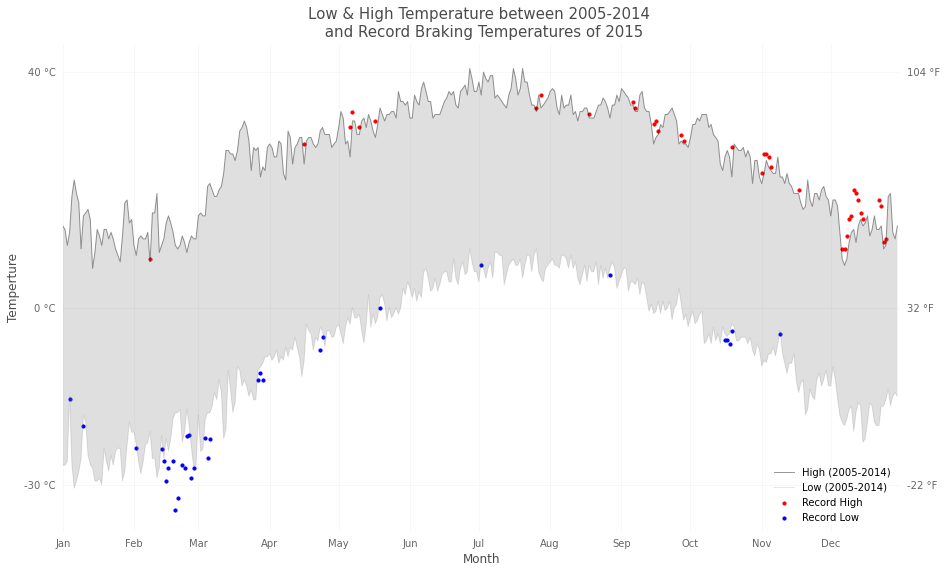

In [368]:
plt.figure()
plt.figure(figsize=(15,9))
ax1 = plt.gca()   # Primary axes  (scatter)
ax2 = ax1.twinx() # Seondary Axis  (line graph)

plt.scatter(record_high.index,record_high['Data_Value'], color = 'r', s = 10)
plt.scatter(record_low.index,record_low['Data_Value'], color = 'b', s = 10)

ax2.plot(max_Dvalue['Data_Value'] , '-', color='K',linewidth = 1,alpha = 0.4)
ax2.plot(min_Dvalue['Data_Value'] , '-', color='K',linewidth = 1,alpha = 0.1)
 
ax2.fill_between(range(len(min_Dvalue['Data_Value'])),
                       min_Dvalue['Data_Value'],
                       max_Dvalue['Data_Value'],
                       facecolor = 'gray',
                       alpha = 0.25)

# set the X_Axis properly.
xticks = [1,32,60,91,121,152,182,213,244,274,305,335]
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                 'Sep','Oct', 'Nov', 'Dec']

ax2.set_xlim(1,365)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks_labels,alpha =0.6)
ax1.set_xticklabels(xticks_labels,alpha =0.6)


# set the Y_Axis 'Celsius' properly.
ax1.set_ylim(-380,450)
# you need to put it into pandas series not list to allow making (+/*) easily.
y_ticks = pd.Series([-300,0,400])
# we have 1/10 °C and we wanna to convert to °C so we'll divide by 10
# but this will bring us float and we want int to be shown beside °C.
y_labels = pd.Series(yticks/10).astype('int').astype('str') + ' °C'
# in action
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_labels , alpha = 0.6)


# set the Y_Axis 'Fahrenheit' properly
ax2.set_ylim(-380,450)
# assign the same y_labels to keep the position of °C & °F 
# to be infront of each other, then assign the desired labels.
ax2.set_yticks(y_ticks)
Fehrn_yticks = pd.Series(((y_ticks/10)*9/5)+32).astype('int')
Fehrn_ylabels = pd.Series(Fehrn_yticks).astype('int').astype('str') + ' °F'
ax2.set_yticklabels(Fehrn_ylabels , alpha = 0.6)


# shaded gray background
ax1.grid(True, alpha = 0.1)

# removing ticks from all the plot's axes.
ax1.tick_params(left = False , bottom = False)
ax2.tick_params(right = False , bottom = False)

# making invsible frame
for spine in ax2.spines:
    ax2.spines[spine].set_visible(False)
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)

# Titles.
ax1.set_title('Low & High Temperature between 2005-2014 \n and Record Braking Temperatures of 2015',fontsize = 15, alpha =0.7)
ax1.set_xlabel('Month',fontsize = 12,alpha =0.7)
ax1.set_ylabel('Temperture',fontsize = 12, alpha =0.7)

# Legend
ax2.legend(loc = 4,labels = ['High (2005-2014)','Low (2005-2014)','Record High','Record Low'], frameon = False)
plt.show();

<font color='red'>Write some python code which returns a line graph of the record high and record low temperatures by `day of the year` over the period `2005-2014`. The area between the record high and record low temperatures for each day should be `shaded`.</font> 

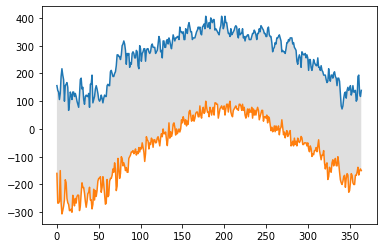

In [264]:
plt.plot(max_Dvalue['Data_Value'] , '-',min_Dvalue['Data_Value'] , '-' )
plt.gca().fill_between(range(len(min_Dvalue['Data_Value'])),
                       min_Dvalue['Data_Value'],
                       max_Dvalue['Data_Value'],
                       facecolor = 'gray',
                       alpha = 0.25);

In [284]:
yticks = pd.Series([-300,0,400])
ylabels = pd.Series(yticks/10)
ylabels

0   -30.0
1     0.0
2    40.0
dtype: float64

In [290]:
Fehrn_yticks = pd.Series(((y_ticks/10)*9/5)+32).astype('int')
Fehrn_yticks

0    -22
1     32
2    104
dtype: int32